<a href="https://colab.research.google.com/github/Rusmandel/Izatov-Rustam/blob/master/Laba4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img_list = os.listdir("/assignments/dataset") 

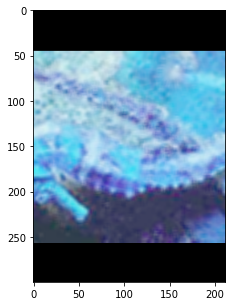

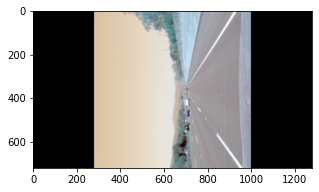

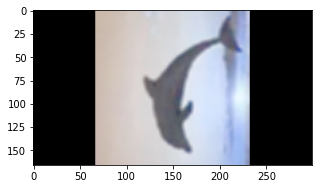

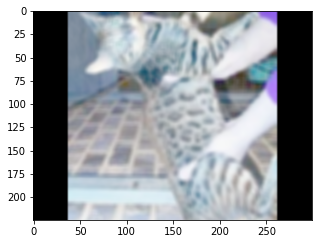

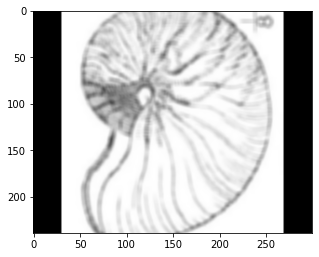

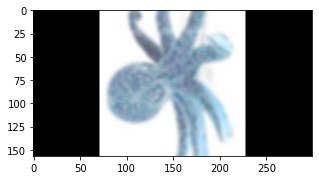

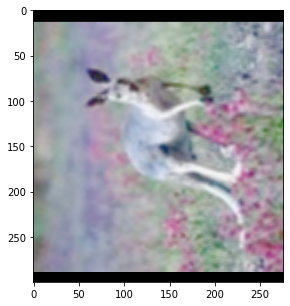

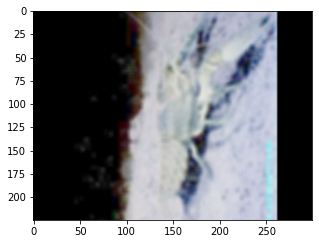

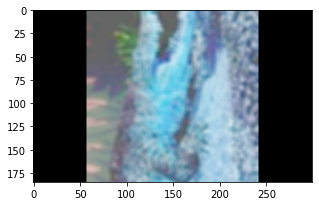

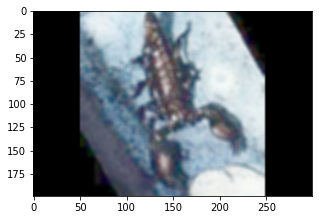

In [16]:
def data_augmentation(img, inv, gam, z, inver, mov):
  width = img.shape[1];
  height = img.shape[0]
  if (inv == 1):
    img = np.iinfo('uint8').max - 1 - img
  img = 1 * np.power(img, gam)
  img = (img / np.max(img)*255).astype(np.uint8)
  kernel = np.ones((z,z),np.float32) / (z * z)
  img  = cv2.filter2D(img, -1, kernel)
  M = cv2.getRotationMatrix2D((width/2, height/2), inver, 1)
  img = cv2.warpAffine(img, M, (width, height))
  if (mov!= 0) :
    M_mov = np.float32(mov)
    img = cv2.warpAffine(img, M_mov, (width, height))
  return img

for i in range(0,len(img_list)-1):
  img = cv2.imread("/assignments/dataset/"+img_list[i-1], cv2.IMREAD_COLOR)
  plt.figure(figsize=(5,5))
  plt.imshow(data_augmentation(img,0,0.4,5,90,0), cmap='gray', vmin = 0, vmax = 255);

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


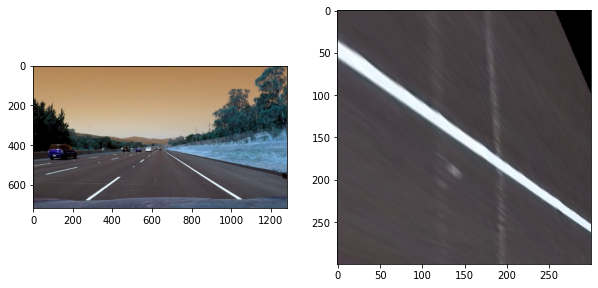

In [20]:
img = cv2.imread("/assignments/dataset/test_img.jpg")
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500
src = np.float32([[400, 600], [1000, 600], [400, 450], [1000, 450]])
dst = np.float32([[200, 200], [200, OUT_IMG_WIDTH+200], [OUT_IMG_HEIGHT+200, OUT_IMG_WIDTH+200], [OUT_IMG_HEIGHT+200, 200]])
M = cv2.getPerspectiveTransform(src, dst)
wraped_img = cv2.warpPerspective(img, M, (300,300))

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(img); 
plt.subplot(122); plt.imshow(wraped_img);
plt.show()